In [1]:
# from jupyterthemes import get_themes
# import jupyterthemes as jt
# from jupyterthemes.stylefx import set_nb_theme
# set_nb_theme('chesterish')

In [2]:
import cv2 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage
import pywt
import os
%matplotlib inline

import seaborn as sns


In [3]:
def image_show(image,nrows=1,cmap ='gray', ncols=1, **kwargs):
    fig,ax = plt.subplots(nrows=nrows,ncols=ncols, figsize = (8,8))
    
    ax.imshow(image, cmap='gray')
    ax.axis("off")
    return fig,ax

In [4]:
def w2d(img, mode='haar', level =1):
    #function for wavelet transform here using pywavelet transform
    imArray = img
    #Convert to grayscale
    imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)
    #convert to Float
    imArray = np.float32(imArray)
    imArray /= 255;
    #compute coeff
    coeffs = pywt.wavedec2(imArray, mode, level = level)
    
    #Process coeff
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0;
    
    #reconstruc
    imArray_H = pywt.waverec2(coeffs_H, mode)
    imArray_H *= 255;
    imArray_H = np.uint8(imArray_H)
    
    return imArray_H


In [5]:
img =  cv2.imread("C:/Users/farha/KAGGLE_DS_PROJECTS/Iconic Shades Classifier/train_data/chevron moustache_cropped/train(10).jpg")

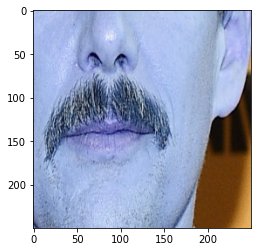

In [6]:
plt.imshow(img)

C:\Users\farha\anaconda3\envs\geo_env\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 6 is too high: all coefficients will experience boundary effects.
  warnings.warn(


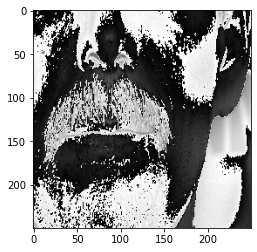

In [7]:
im_har = w2d(img,'coif5', 6)
plt.imshow(im_har, cmap = 'gray')

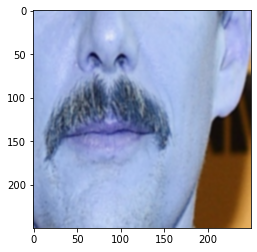

In [8]:
blur = cv2.GaussianBlur(img,(5,5),0)
plt.imshow(blur)

C:\Users\farha\anaconda3\envs\geo_env\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 8 is too high: all coefficients will experience boundary effects.
  warnings.warn(


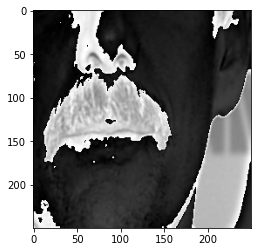

In [9]:
i = 4.4
param = f"db6"
im_blur = w2d(blur,param, 8 )
plt.imshow(im_blur, cmap = 'gray')

## Images to numpy arrays

In [10]:
facials = ['chevron moustache', 'toothbrush moustache', 'pencil moustache', 'handlebar moustache', 'horseshoe moustache']  

In [11]:
facials_dict = {}
count = 0
for facial in facials:
    facials_dict[facial] = count
    count = count + 1
facials_dict

{'chevron moustache': 0,
 'toothbrush moustache': 1,
 'pencil moustache': 2,
 'handlebar moustache': 3,
 'horseshoe moustache': 4}

In [65]:
X= []
y= []

for folder in facials:
    dir_path = f"C:/Users/farha/KAGGLE_DS_PROJECTS/Iconic Shades Classifier/train_data/{folder}" + '_cropped5'
    #counts number of files in folder
    files_in_folder = len([name for name in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, name))]) 
    print(folder)
    for i in range(files_in_folder):
        path = os.path.join(dir_path,str(f"train({i+1})")+'.jpg')
        
        img = cv2.imread(path)
        if img is None:
            continue
        blur = cv2.GaussianBlur(img,(5,5),0)
        img_har = w2d(blur,'db6', 5)
        
        combined_img = np.vstack((img.reshape(300*300*3,1), img_har.reshape(300*300,1)))
        X.append(combined_img)
        y.append(facials_dict[folder])
    

chevron moustache


C:\Users\farha\anaconda3\envs\geo_env\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 5 is too high: all coefficients will experience boundary effects.
  warnings.warn(


toothbrush moustache
pencil moustache
handlebar moustache
horseshoe moustache


In [24]:
X

[array([[203],
        [207],
        [255],
        ...,
        [235],
        [237],
        [239]], dtype=uint8),
 array([[140],
        [153],
        [197],
        ...,
        [ 43],
        [ 10],
        [251]], dtype=uint8),
 array([[193],
        [203],
        [227],
        ...,
        [244],
        [246],
        [247]], dtype=uint8),
 array([[ 92],
        [138],
        [185],
        ...,
        [ 39],
        [ 37],
        [ 36]], dtype=uint8),
 array([[115],
        [130],
        [209],
        ...,
        [243],
        [246],
        [248]], dtype=uint8),
 array([[181],
        [183],
        [217],
        ...,
        [242],
        [247],
        [249]], dtype=uint8),
 array([[181],
        [183],
        [217],
        ...,
        [242],
        [247],
        [249]], dtype=uint8),
 array([[147],
        [163],
        [210],
        ...,
        [ 67],
        [ 60],
        [ 57]], dtype=uint8),
 array([[145],
        [165],
        [223],
        ...

In [25]:
for folder in facials:
    dir_path = f"C:/Users/farha/KAGGLE_DS_PROJECTS/Iconic Shades Classifier/train_data/{folder}"+ '_cropped3'
    files_in_folder = len([name for name in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, name))])
    dir_path_filtered = dir_path + '_filtered2'
    if not os.path.exists(dir_path_filtered):
        os.makedirs(dir_path_filtered)
    os.chdir(dir_path_filtered)
     

    for i in range(files_in_folder):
        path = os.path.join(dir_path,str(f"train({i+1})")+'.jpg')
        
        img = cv2.imread(path)
        if img is None:
            continue
        blur = cv2.GaussianBlur(img,(5,5),0)
        img_har = w2d(blur,'db6', 6)
        
        filename = str(f"train({i+1})"+'.jpg')
        cv2.imwrite(filename, img_har)
        

In [26]:
y[0]

0

In [27]:
len(X[0])

10000

In [28]:
250*250*3 + 250*250

250000

### Model Tuning

### Optimize Image Filter



In [34]:
db_filters = ['db1', 'db2', 'db3','db4','db5','db6','db7','db8','db9','db10','db11','db12','db13','db14','db15','db16','db17','db18','db19','db20']
filter_acc_scores = []

for db in db_filters:
    X= []
    y= []
    i = 0
    i += 1
    print(i)

    for folder in facials:
        dir_path = f"C:/Users/farha/KAGGLE_DS_PROJECTS/Iconic Shades Classifier/train_data/{folder}" + '_cropped3'
        #counts number of files in folder
        files_in_folder = len([name for name in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, name))]) 
        print(folder)
        for i in range(files_in_folder):
            path = os.path.join(dir_path,str(f"train({i+1})")+'.jpg')

            img = cv2.imread(path)
            if img is None:
                continue
            blur = cv2.GaussianBlur(img,(5,5),0)
            img_har = w2d(blur,db, 6)

            combined_img = np.vstack((img.reshape(50*50*3,1), img_har.reshape(50*50,1)))
            X.append(combined_img)
            y.append(facials_dict[folder])
        
    
    X = np.array(X).reshape(len(X),10000).astype(float)
    
    #define pipeline
    
    steps = []
    steps.append(('scaler',MinMaxScaler()))
    steps.append(('svc', SVC(C= 10, kernel= 'rbf')))
    pipeline = Pipeline(steps=steps)
    
    #define eval process
    
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
    
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    
    mean_score = mean(scores)

    
    filter_acc_scores.append(mean_score)



1
chevron moustache


C:\Users\farha\anaconda3\envs\geo_env\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 6 is too high: all coefficients will experience boundary effects.
  warnings.warn(


toothbrush moustache
pencil moustache
handlebar moustache
horseshoe moustache
1
chevron moustache
toothbrush moustache


C:\Users\farha\anaconda3\envs\geo_env\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 6 is too high: all coefficients will experience boundary effects.
  warnings.warn(


pencil moustache
handlebar moustache
horseshoe moustache
1
chevron moustache
toothbrush moustache


C:\Users\farha\anaconda3\envs\geo_env\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 6 is too high: all coefficients will experience boundary effects.
  warnings.warn(


pencil moustache
handlebar moustache
horseshoe moustache
1
chevron moustache
toothbrush moustache


C:\Users\farha\anaconda3\envs\geo_env\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 6 is too high: all coefficients will experience boundary effects.
  warnings.warn(


pencil moustache
handlebar moustache
horseshoe moustache
1
chevron moustache
toothbrush moustache


C:\Users\farha\anaconda3\envs\geo_env\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 6 is too high: all coefficients will experience boundary effects.
  warnings.warn(


pencil moustache
handlebar moustache
horseshoe moustache
1
chevron moustache
toothbrush moustache


C:\Users\farha\anaconda3\envs\geo_env\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 6 is too high: all coefficients will experience boundary effects.
  warnings.warn(


pencil moustache
handlebar moustache
horseshoe moustache
1
chevron moustache
toothbrush moustache


C:\Users\farha\anaconda3\envs\geo_env\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 6 is too high: all coefficients will experience boundary effects.
  warnings.warn(


pencil moustache
handlebar moustache
horseshoe moustache
1
chevron moustache
toothbrush moustache


C:\Users\farha\anaconda3\envs\geo_env\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 6 is too high: all coefficients will experience boundary effects.
  warnings.warn(


pencil moustache
handlebar moustache
horseshoe moustache
1
chevron moustache
toothbrush moustache


C:\Users\farha\anaconda3\envs\geo_env\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 6 is too high: all coefficients will experience boundary effects.
  warnings.warn(


pencil moustache
handlebar moustache
horseshoe moustache
1
chevron moustache
toothbrush moustache


C:\Users\farha\anaconda3\envs\geo_env\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 6 is too high: all coefficients will experience boundary effects.
  warnings.warn(


pencil moustache
handlebar moustache
horseshoe moustache
1
chevron moustache
toothbrush moustache


C:\Users\farha\anaconda3\envs\geo_env\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 6 is too high: all coefficients will experience boundary effects.
  warnings.warn(


pencil moustache
handlebar moustache
horseshoe moustache
1
chevron moustache
toothbrush moustache


C:\Users\farha\anaconda3\envs\geo_env\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 6 is too high: all coefficients will experience boundary effects.
  warnings.warn(


pencil moustache
handlebar moustache
horseshoe moustache
1
chevron moustache


C:\Users\farha\anaconda3\envs\geo_env\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 6 is too high: all coefficients will experience boundary effects.
  warnings.warn(


toothbrush moustache
pencil moustache
handlebar moustache
horseshoe moustache
1
chevron moustache


C:\Users\farha\anaconda3\envs\geo_env\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 6 is too high: all coefficients will experience boundary effects.
  warnings.warn(


toothbrush moustache
pencil moustache
handlebar moustache
horseshoe moustache
1
chevron moustache


C:\Users\farha\anaconda3\envs\geo_env\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 6 is too high: all coefficients will experience boundary effects.
  warnings.warn(


toothbrush moustache
pencil moustache
handlebar moustache
horseshoe moustache
1
chevron moustache


C:\Users\farha\anaconda3\envs\geo_env\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 6 is too high: all coefficients will experience boundary effects.
  warnings.warn(


toothbrush moustache
pencil moustache
handlebar moustache
horseshoe moustache
1
chevron moustache


C:\Users\farha\anaconda3\envs\geo_env\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 6 is too high: all coefficients will experience boundary effects.
  warnings.warn(


toothbrush moustache
pencil moustache
handlebar moustache
horseshoe moustache
1
chevron moustache


C:\Users\farha\anaconda3\envs\geo_env\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 6 is too high: all coefficients will experience boundary effects.
  warnings.warn(


toothbrush moustache
pencil moustache
handlebar moustache
horseshoe moustache
1
chevron moustache


C:\Users\farha\anaconda3\envs\geo_env\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 6 is too high: all coefficients will experience boundary effects.
  warnings.warn(


toothbrush moustache
pencil moustache
handlebar moustache
horseshoe moustache
1
chevron moustache


C:\Users\farha\anaconda3\envs\geo_env\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 6 is too high: all coefficients will experience boundary effects.
  warnings.warn(


toothbrush moustache
pencil moustache
handlebar moustache
horseshoe moustache


<AxesSubplot:>

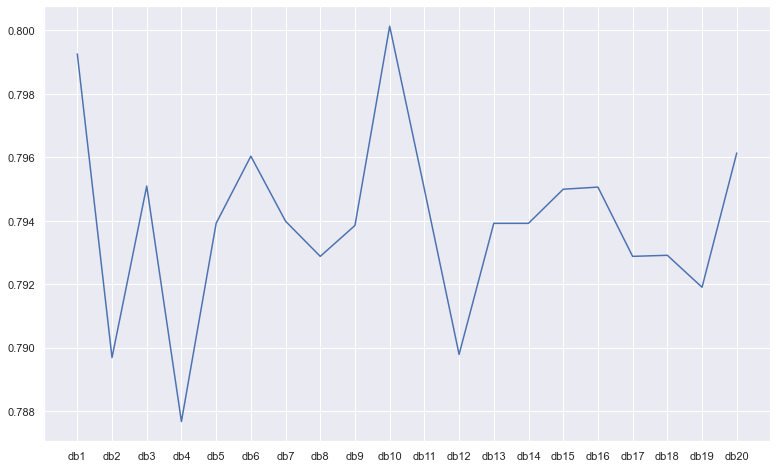

In [35]:
plt.figure(figsize=[13,8])
sns.set_theme()
sns.lineplot(x = db_filters, y =  filter_acc_scores)

### Optimize image filter intensity

In [36]:
filter_intens = [i for i in range(1,11)]
filter_intens_scores = []
j = 0

for lvl in filter_intens:
    X= []
    y= []
    
    j += 1
    print(j)

    for folder in facials:
        dir_path = f"C:/Users/farha/KAGGLE_DS_PROJECTS/Iconic Shades Classifier/train_data/{folder}" + '_cropped3'
        #counts number of files in folder
        files_in_folder = len([name for name in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, name))]) 
        print(folder)
        for i in range(files_in_folder):
            path = os.path.join(dir_path,str(f"train({i+1})")+'.jpg')

            img = cv2.imread(path)
            if img is None:
                continue
            blur = cv2.GaussianBlur(img,(5,5),0)
            img_har = w2d(blur,'db10', lvl)

            combined_img = np.vstack((img.reshape(50*50*3,1), img_har.reshape(50*50,1)))
            X.append(combined_img)
            y.append(facials_dict[folder])
        
    
    X = np.array(X).reshape(len(X),10000).astype(float)
    
    #define pipeline
    
    steps = []
    steps.append(('scaler',MinMaxScaler()))
    steps.append(('svc', SVC(C= 10, kernel= 'rbf')))
    pipeline = Pipeline(steps=steps)
    
    #define eval process
    
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
    
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    
    mean_score = mean(scores)

    
    filter_intens_scores.append(mean_score)



1
chevron moustache
toothbrush moustache
pencil moustache
handlebar moustache
horseshoe moustache
2
chevron moustache
toothbrush moustache
pencil moustache


C:\Users\farha\anaconda3\envs\geo_env\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 2 is too high: all coefficients will experience boundary effects.
  warnings.warn(


handlebar moustache
horseshoe moustache
3
chevron moustache
toothbrush moustache


C:\Users\farha\anaconda3\envs\geo_env\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 3 is too high: all coefficients will experience boundary effects.
  warnings.warn(


pencil moustache
handlebar moustache
horseshoe moustache
4
chevron moustache
toothbrush moustache


C:\Users\farha\anaconda3\envs\geo_env\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 4 is too high: all coefficients will experience boundary effects.
  warnings.warn(


pencil moustache
handlebar moustache
horseshoe moustache
5
chevron moustache
toothbrush moustache


C:\Users\farha\anaconda3\envs\geo_env\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 5 is too high: all coefficients will experience boundary effects.
  warnings.warn(


pencil moustache
handlebar moustache
horseshoe moustache
6
chevron moustache
toothbrush moustache


C:\Users\farha\anaconda3\envs\geo_env\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 6 is too high: all coefficients will experience boundary effects.
  warnings.warn(


pencil moustache
handlebar moustache
horseshoe moustache
7
chevron moustache


C:\Users\farha\anaconda3\envs\geo_env\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 7 is too high: all coefficients will experience boundary effects.
  warnings.warn(


toothbrush moustache
pencil moustache
handlebar moustache
horseshoe moustache
8
chevron moustache


C:\Users\farha\anaconda3\envs\geo_env\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 8 is too high: all coefficients will experience boundary effects.
  warnings.warn(


toothbrush moustache
pencil moustache
handlebar moustache
horseshoe moustache
9
chevron moustache


C:\Users\farha\anaconda3\envs\geo_env\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 9 is too high: all coefficients will experience boundary effects.
  warnings.warn(


toothbrush moustache
pencil moustache
handlebar moustache
horseshoe moustache
10
chevron moustache


C:\Users\farha\anaconda3\envs\geo_env\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 10 is too high: all coefficients will experience boundary effects.
  warnings.warn(


toothbrush moustache
pencil moustache
handlebar moustache
horseshoe moustache


In [38]:
filter_intens_scores

[0.7897849462365591,
 0.777116935483871,
 0.7835685483870969,
 0.7835349462365592,
 0.8065860215053764,
 0.8001344086021505,
 0.7908266129032258,
 0.7793346774193547,
 0.7762096774193548,
 0.7762096774193548]

<AxesSubplot:>

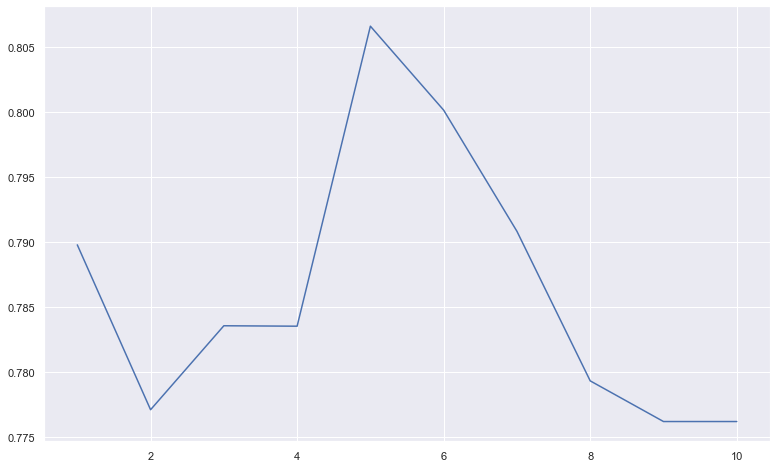

In [39]:
plt.figure(figsize=[13,8])
sns.set_theme()
sns.lineplot(x = filter_intens, y =  filter_intens_scores)

### CRUCIAL

In [67]:
X = np.array(X).reshape(len(X),360000).astype(float)
X.shape

(330, 360000)

In [16]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

**GridSearch Function**

In [17]:
def performGridSearch(pipeline, params, scoring, X_tr, y_tr, X_te, y_te):
    
    grid = GridSearchCV(pipeline, params, cv = 5, scoring = scoring)
    
    grid.fit(X_tr,y_tr)
    
    print('Best score', grid.best_score_)
    print('Best params', grid.best_params_)
    
    y_pred = grid.best_estimator_.predict(X_te)
    print(classification_report(y_te, y_pred))

### Stacked Classifiers

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#LogRegression

lgreg = LogisticRegression(multi_class='multinomial', solver='lbfgs',C = 0.01)

#GradientBoosting

gbt =  GradientBoostingClassifier()
gbt_param_dist = {"n_estimators": 300,
              "learning_rate": 0.1,
              "max_features": 6,
              "max_depth": 4}

## KNN

knn = KNeighborsClassifier()

knn_params = {'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'uniform'}

knn.set_params(**knn_params)

# SVC 

svc = SVC() #Multi-class option avaliable for this SVC

svc_params = {'C': 10, 'kernel': 'rbf'}

svc.set_params(**svc_params)

logreg_clf = LogisticRegression()


In [69]:
scaler = MinMaxScaler()



X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [70]:
# gbt.fit(X_train_scaled, y_train)

# knn.fit(X_train_scaled, y_train)

svc.fit(X_train_scaled, y_train)

# lgreg.fit(X_train_scaled, y_train)

# print(accuracy_score(y_test,gbt.predict(X_test_scaled)))

# print(accuracy_score(y_test,knn.predict(X_test_scaled)))

print(accuracy_score(y_test,svc.predict(X_test_scaled)))

# print(accuracy_score(y_test,lgreg.predict(X_test_scaled)))


0.7469879518072289


In [71]:
print(classification_report(y_test, svc.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.67      0.89      0.76        27
           1       1.00      0.60      0.75        15
           2       0.76      0.76      0.76        21
           3       0.75      0.75      0.75        16
           4       1.00      0.25      0.40         4

    accuracy                           0.75        83
   macro avg       0.84      0.65      0.68        83
weighted avg       0.78      0.75      0.74        83



# bring back to 100 x 100

In [ ]:
models = [
    ('lgreg', lgreg),
    ('gbt', gbt),
    ('knn', knn),
    ('svc', svc)
]



sclf = StackingClassifier(estimators=models, final_estimator=logreg_clf, cv=5)

sclf.fit(X_train, y_train)

print(accuracy_score(y_test,sclf.predict(X_test)))


import time

start = time.time()
end = time.time()
print(end - start)

## KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 1)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

knn.score(X_test, y_test)

In [ ]:
neighbors = [i for i in range(1,25)]

train_accuracy = []

test_accuracy = []

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

for i, k in enumerate(neighbors):
    
    knn = KNeighborsClassifier(n_neighbors = k)
    
    knn.fit(X_train, y_train)
    
    train_accuracy.append(knn.score(X_train,y_train))
    
    test_accuracy.append(knn.score(X_test,y_test))
    

In [ ]:
plt.figure(figsize=[13,8])
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neighbors)
plt.savefig('graph.png')
plt.show()

In [ ]:

knn = KNeighborsClassifier()

knn_params = { 'knn__n_neighbors' : [1,3,4,5],
               'knn__weights' : ['uniform','distance'],
               'knn__metric' : ['minkowski','euclidean','manhattan']}

knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', knn)])

In [ ]:
performGridSearch(knn_pipe, knn_params, 'accuracy', X_train,y_train,X_test,y_test)


### Decision Tree

In [ ]:
dbt = DecisionTreeClassifier()
dbt.get_params()

In [ ]:
depths = [i for i in range(1,25)]

dbt_train_accuracy = []

dbt_test_accuracy = []



for i, k in enumerate(depths):
    
    dtclf = DecisionTreeClassifier(max_depth=k)
    
    dtclf.fit(X_train, y_train)
    
    dbt_train_accuracy.append(dtclf.score(X_train,y_train))
    
    dbt_test_accuracy.append(dtclf.score(X_test,y_test))
    

In [ ]:
plt.figure(figsize=[13,8])
plt.plot(depths, dbt_test_accuracy, label = 'Testing Accuracy')
plt.plot(depths, dbt_train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.xticks(depths)

plt.show()

In [ ]:


dtclf = DecisionTreeClassifier()

dectree_pipe = Pipeline([('scaler', StandardScaler()), ('dtclf', dtclf)])

In [ ]:

    
param_dist = {
    "dtclf__criterion" : ['gini', 'entropy'],
    "dtclf__max_depth": [i for i in range(10,15)],
    "dtclf__min_samples_split": [0.05, 0.25],
    "dtclf__min_samples_leaf": [1, 3],
    "dtclf__max_leaf_nodes": [None]
}


In [ ]:
performGridSearch(dectree_pipe, param_dist, 'accuracy', X_train,y_train,X_test,y_test)



## Gradient Boost

In [ ]:
gbt = GradientBoostingClassifier(n_estimators=300)

gbt.fit(X_train, y_train)

gbt.score(X_train,y_train)


In [ ]:
estimators = [i for i in range(100, 600, 100)]

gbt_train_accuracy = []

gbt_test_accuracy = []




for i, k in enumerate(estimators):
    
    gbt = GradientBoostingClassifier(n_estimators=k)
    
    gbt.fit(X_train, y_train)
    
    gbt_train_accuracy.append(gbt.score(X_train,y_train))
    
    gbt_test_accuracy.append(gbt.score(X_test,y_test))
    

In [ ]:
plt.figure(figsize=[13,8])
plt.plot(depths, gbt_test_accuracy, label = 'Testing Accuracy')
plt.plot(depths, gbt_train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Estimators')
plt.ylabel('Accuracy')
plt.xticks(depths)

plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

gbt =  GradientBoostingClassifier()

gbt_param_dist = {"gbt__n_estimators": [300],
              "gbt__learning_rate": [0.05, 0.1],
              "gbt__max_features": [6, 10],
              "gbt__max_depth": [4, 6]}

gbt_pipe = Pipeline([('scaler', StandardScaler()), ('gbt', gbt)])

In [ ]:
performGridSearch(gbt_pipe, gbt_param_dist, 'accuracy', X_train,y_train,X_test,y_test)


In [ ]:
scores_estimators = []

estimators = [i for i in range(100, 600, 50)]

gbt =  GradientBoostingClassifier()


for estimator in estimators:
    
        gbt_param_dist = {"n_estimators": estimator,
              "learning_rate": 0.1,
              "max_features": 6,
              "max_depth": 4}
        
        gbt.set_params(**gbt_param_dist)
    
        gbt.fit(X_train, y_train)
    
        scores_estimators.append(round(accuracy_score(y_test,gbt.predict(X_test)), 5))


In [ ]:
g2 = sns.scatterplot(x = estimators, y =  scores_estimators)

g2.set(xlabel = 'Est', ylabel = 'accuracy')

plt.show()

## Multi Class Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lgreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')

lgreg_param_dist = {"lgreg__C": [0.0, 0.0001, 0.001, 0.01, 0.1, 1.0]}

lgreg_pipe = Pipeline([('scaler', StandardScaler()), ('lgreg', lgreg)])

In [ ]:
performGridSearch(lgreg_pipe, lgreg_param_dist, 'accuracy', X_train,y_train,X_test,y_test)


## Stacked 

In [ ]:
##LOGRegression

lgreg = LogisticRegression(multi_class='multinomial', solver='lbfgs',C = 0.01)

#GradBoosting

gbt =  GradientBoostingClassifier()
gbt_param_dist = {"n_estimators": 300,
              "learning_rate": 0.1,
              "max_features": 6,
              "max_depth": 4}
        
gbt.set_params(**gbt_param_dist)

#KNN
knn = KNeighborsClassifier()

knn_params = {'knn__metric': 'minkowski', 'knn__n_neighbors': 1, 'knn__weights': 'uniform'}

knn.set_params(**knn_params)

logreg_clf = LogisticRegression()

In [ ]:
gbt.fit(X_train, y_train)

lgreg.fit(X_train, y_train)

print(accuracy_score(y_test,gbt.predict(X_test)))

print(accuracy_score(y_test,lgreg.predict(X_test)))

In [ ]:
models = [
    ('lgreg', lgreg),
    ('gbt', gbt)
]



sclf = StackingClassifier(estimators=models, final_estimator=logreg_clf, cv=5)

sclf.fit(X_train, y_train)

print(accuracy_score(y_test,sclf.predict(X_test)))

### SVC

In [43]:
svc = SVC()

svc_pipe = Pipeline([('scaler', StandardScaler()), ('svc', svc)])

In [44]:
svc_param_dist = {
    "svc__kernel" : ['rbf'],
    "svc__C": [1, 1000],
    "svc__degree": [1, 3, 5]
}


In [45]:
svc.get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

performGridSearch(svc_pipe, svc_param_dist, 'accuracy', X_train, y_train, X_test, y_test)



C:\Users\farha\anaconda3\envs\geo_env\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\farha\anaconda3\envs\geo_env\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\farha\anaconda3\envs\geo_env\lib\site-packages\sklearn\pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\farha\anaconda3\envs\geo_env\lib\site-packages\sklearn\pipeline.py", line 348, in _fit
    X, fitted_transformer = fit_

ValueError: Found array with dim 3. StandardScaler expected <= 2.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

In [ ]:
print(classification_report(y_test, pipe.predict(X_test)))

In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [ ]:
model_params = {
   
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [ ]:
pr = {'params': {
            'logisticregression__C': [10]}}

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:


pipe = make_pipeline(StandardScaler(), LogisticRegression(solver='liblinear',multi_class='auto'))
clf =  GridSearchCV(pipe, pr['params'], cv=5, return_train_score=False)
clf.fit(X_train, y_train)



In [ ]:
clf.best_score_

In [ ]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    print(mp)
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

In [ ]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,50],
            'svc__kernel': ['rbf', 'linear']
        }  
    }
}

In [ ]:
scores = []
best_estimators = {}
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), SVC(gamma='auto', probability=True))
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': 'SVM',
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

In [ ]:
best_estimators['svm'].score(X_test,y_test)

SAVE ML MODEL

In [ ]:
best_clf = best_estimators['svm']

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,best_clf.predict(X_test))
cm

In [ ]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [ ]:
!pip install joblib

In [ ]:
import joblib
joblib.dump(best_clf, 'saved_model.pkl')

In [ ]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(facials_dict))